<a href="https://colab.research.google.com/github/mobinym/Space_TItanic_Kaggle/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/sample_submission.csv")
df2 = pd.read_csv("/content/drive/MyDrive/DataSets/train.csv")
df3 = pd.read_csv("/content/drive/MyDrive/DataSets/test.csv")


In [62]:
df2.head()
df2.columns
df2.dtypes
df2.nunique()

,0
CryoSleep,2
Cabin,6560
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115
Spa,1327
VRDeck,1306
Transported,2


In [29]:
df2.drop(columns=["PassengerId", "Name"], inplace=True)

In [40]:
df2.shape
df2.columns
df2.dtypes
df2.nunique()
df2.info()
df2.describe()
df2.isnull().sum()
df2.corr()
df2.value_counts().to_frame()
df2["floors"].value_counts().to_frame()

,0
HomePlanet,object
CryoSleep,bool
Cabin,object
Destination,object
Age,float64
VIP,bool
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64


fillna

In [37]:
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for col in num_cols:
    df2[col].fillna(df2[col].median(), inplace=True)




cat_cols = ["HomePlanet", "CryoSleep", "VIP", "Destination","Cabin"]
for col in cat_cols:
    df2[col].fillna(df2[col].mode()[0], inplace=True)

<ipython-input-37-5816c523e1c7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].median(), inplace=True)
<ipython-input-37-5816c523e1c7>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [38]:
df2.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [39]:
df2.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


encoding

In [59]:
label_cols = ["CryoSleep", "VIP","Cabin"]
label_encoder = LabelEncoder()

for col in label_cols:
    df2[col] = label_encoder.fit_transform(df2[col])



In [63]:
df2.drop(columns=["Cabin"], inplace=True)

In [52]:
df2 = pd.get_dummies(df2, columns=["HomePlanet", "Destination"], drop_first=True)

In [64]:
df2.head(100)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,24.0,0,0.0,0.0,0.0,0.0,17.0,True,False,False,False,True
96,1,9.0,0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False
97,1,6.0,0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True
98,0,27.0,0,0.0,0.0,570.0,2.0,131.0,False,False,False,False,True


Standard-Scaler

In [65]:
from sklearn.preprocessing import StandardScaler


columns_to_scale = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]


scaler = StandardScaler()

df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [66]:
df2.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0.711945,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,False,True,False,False,True
1,0,-0.334037,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,True,False,False,False,True
2,0,2.036857,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,False,True,False,False,True
3,0,0.293552,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,False,True,False,False,True
4,0,-0.891895,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,True,False,False,False,True


outlier data

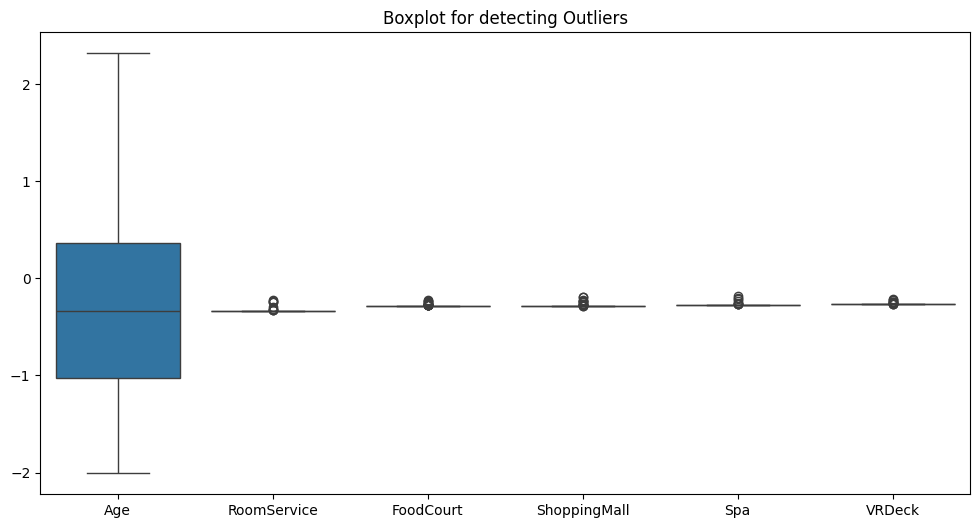

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df2[columns_to_scale])
plt.title("Boxplot for detecting Outliers")
plt.show()

In [70]:

Q1 = df2[columns_to_scale].quantile(0.25)
Q3 = df2[columns_to_scale].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df2[~((df2[columns_to_scale] < lower_bound) | (df2[columns_to_scale] > upper_bound)).any(axis=1)]

df2.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0.711945,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,False,True,False,False,True
7,1,-0.055109,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,True,False,False,False,True
9,1,-1.031359,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,True,True,False,False,False
10,1,0.363284,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,True,True,False,False,True
18,1,1.130339,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,True,False,True,False,True


model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df2.drop("Transported", axis=1)
y = df2["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


logistic


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy: ", accuracy_logreg)


Logistic Regression Accuracy:  0.7771664374140302


svm

In [76]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: ", accuracy_svm)


SVM Accuracy:  0.7909215955983494


knn

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy: ", accuracy_knn)


KNN Accuracy:  0.7744154057771664


xgboost

In [78]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy: ", accuracy_xgb)


XGBoost Accuracy:  0.782668500687758


ExtraTreesClassifier

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train, y_train)

y_pred_extra_trees = extra_trees.predict(X_test)

accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("ExtraTrees Accuracy: ", accuracy_extra_trees)


ExtraTrees Accuracy:  0.7799174690508941


Hyperparameter search GridSearchCV



In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

svm_model = SVC()

param_dist = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'] + list(uniform(0.001, 0.1).rvs(10)),
    'kernel': ['linear', 'rbf']
}

random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print(f"Best Params: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'C': 6.086584841970366, 'gamma': 0.08524308649145783, 'kernel': 'rbf'}
Best Score: 0.7929870664127471


In [86]:
best_svm = SVC(C=6.09, gamma=0.0852, kernel='rbf')

best_svm.fit(X_train, y_train)

test_accuracy = best_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.7881705639614855


VISUALIZATION


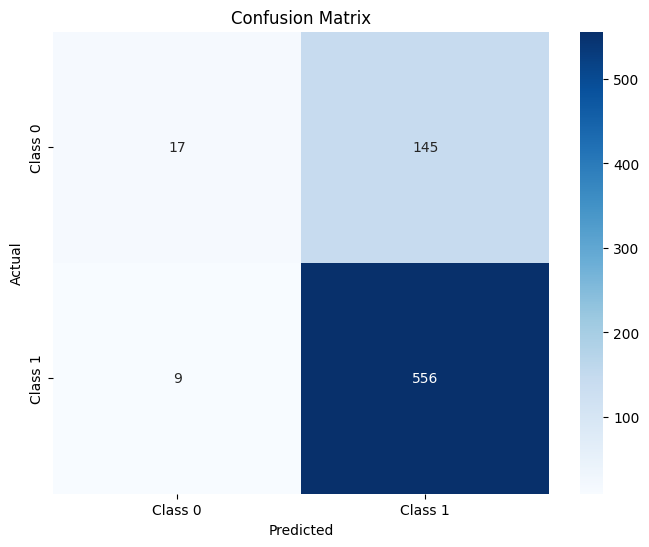

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = best_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


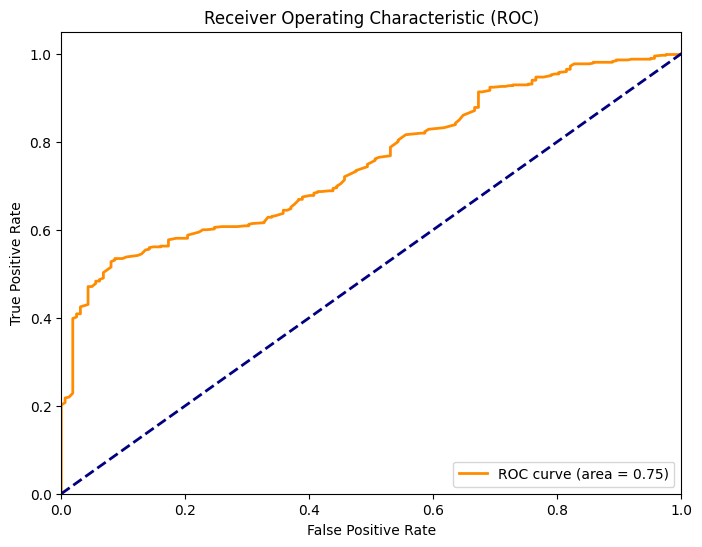

In [89]:
from sklearn.metrics import roc_curve, auc

y_prob = best_svm.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


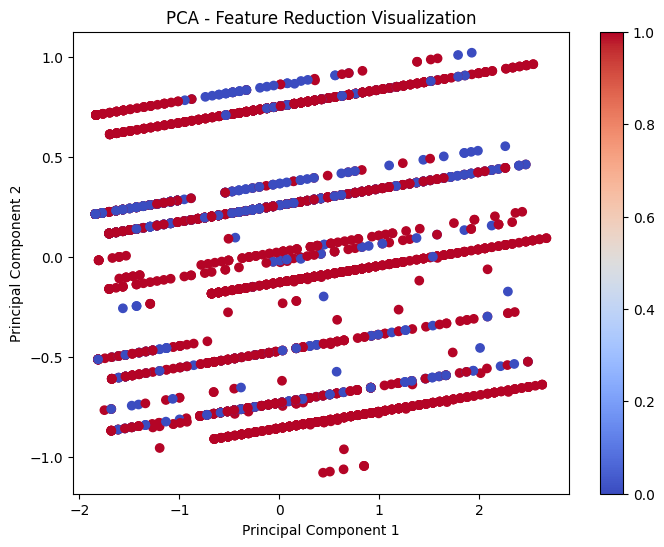

In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm')
plt.colorbar()
plt.title('PCA - Feature Reduction Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [93]:
df3.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


save model


In [94]:
import joblib

joblib.dump(best_svm, 'best_svm_model.pkl')

loaded_model = joblib.load('best_svm_model.pkl')


In [102]:
numeric_cols = df3.select_dtypes(include=['number']).columns

df3_clean[numeric_cols] = df3[numeric_cols].fillna(df3[numeric_cols].mean())


In [103]:
cat_cols = ["HomePlanet", "CryoSleep", "VIP", "Destination", "Cabin"]
for col in cat_cols:
    df3_clean[col].fillna(df3_clean[col].mode()[0], inplace=True)


KeyError: 'HomePlanet'

In [123]:
df3.shape
df3.columns
df3.dtypes
df3.nunique()
df3.info()
df3.describe()
df3.isnull().sum()
df3.corr()
df3.value_counts().to_frame()
df3["floors"].value_counts().to_frame()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [107]:
df3.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [122]:
df3['Age'].fillna(df3['Age'].mean(), inplace=True)



cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin']
for col in cat_cols:
    df3[col].fillna(df3[col].mode()[0], inplace=True)




num_cols = ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in num_cols:
    df3[col].fillna(df3[col].mode()[0], inplace=True)

df3['Name'].fillna(df3['Name'].mode()[0], inplace=True)

print(df_test.isnull().sum())



CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64


<ipython-input-122-c166d34ba229>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[col].fillna(df3[col].mode()[0], inplace=True)
<ipython-input-122-c166d34ba229>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3[col].fillna(df3[col].mode()[0], inplace=True)
<ipython-input-122-c166d34ba229>:6: FutureWarnin

In [124]:
df_test = pd.get_dummies(df3, columns=["HomePlanet", "Destination"], drop_first=True)

df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

df_test = df_test.reindex(columns=X_train.columns, fill_value=0)

y_pred_test = best_svm.predict(df_test)

submission = pd.DataFrame({
    'PassengerId': df3['PassengerId'],
    'Transported': y_pred_test
})

submission.to_csv('submission.csv', index=False)

print(submission.head())


  PassengerId  Transported
0     0013_01         True
1     0018_01         True
2     0019_01         True
3     0021_01         True
4     0023_01        False
